***
# <font color=blue size=10>Exercícios</font>
***

## Exercícios Estatística

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios mais atual que a utilizada em nossos experimentos. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

**Obs: O trabalho deverá ser desenvolvido em duplas.**

# <font color=blue>DATASET DO PROJETO</font>
***

Utilize um dataset coletado do IBGE ou de outra fonte confiável. Não se esquece de adicionar as referências e os dados sobre o dataset.

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [67]:
"""
Feito por mim: Luiz Brandão
dia: 22/jan/2022
terminado as 22h14min (e não! Não tenho vida social, brincadeira! Fui em um casamento hoje, casamos o Raimundo com a Fê. Felicidade aos noivos.)
OBS.: pode copiar, só não sei se tá certo
"""

import pandas as pd

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SENAI_PR/exercicios/dados.csv')

# display(dados)
# dados.tail()
dados.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

### Visualize o conteúdo do DataFrame

In [22]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo <b>Atual</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [95]:
# dados.keys()
# Criando o índice das classes de renda
sm = 1212
classes = [dados['Renda'].min(), 2*sm,  5*sm, 15*sm, 25*sm, dados['Renda'].max()]
classes

[0, 2424, 6060, 18180, 30300, 200000]

### 2º Definir os labels das classes

In [20]:
# Criando os labels

labels = ['E', 'D', 'C', 'B', 'A ']
labels

['E', 'D', 'C', 'B', 'A ']

### 3º Construir a coluna de frequências

In [23]:
# Utilizando o método cut do Pandas

pd.cut(x = dados.Renda,
      bins=classes,
      labels=labels,
      include_lowest=True)

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A ']

In [24]:
# Criando a tabela de Frequencia
freq = pd.value_counts(
    pd.cut(x = dados.Renda,
          bins=classes,
          labels=labels,
          include_lowest=True)
)
freq

E     60848
D     12345
C      3205
B       366
A        76
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [30]:
# Criando a tabela de percentual

percep = pd.value_counts(
    pd.cut(x = dados.Renda,
          bins=classes,
          labels=labels,
          include_lowest=True),
    normalize=True
)
(percep*100).round(2)

E     79.19
D     16.07
C      4.17
B      0.48
A      0.10
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [35]:
# Criando um novo Dataframe baseado em dados de renda

dist2_df = pd.DataFrame({'Frequenca':freq, 'Porcentagem (%)':percep })
dist2_df.sort_index(ascending=False)


,Frequenca,Porcentagem (%)
A,76,0.000989
B,366,0.004763
C,3205,0.041710
D,12345,0.160659
E,60848,0.791879


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Valores')

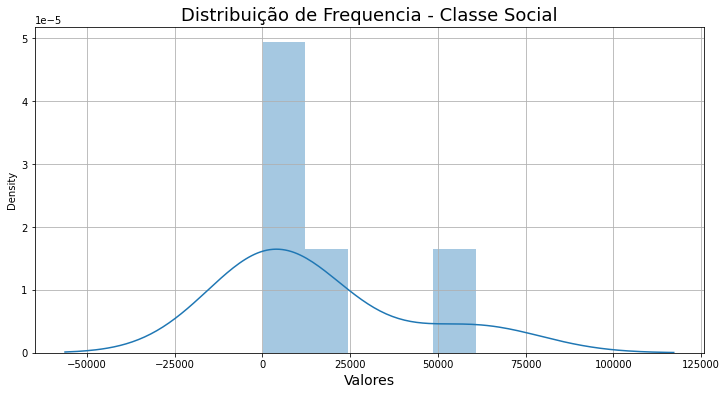

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# criando a variável com os dados e utilizando KDE (representa a função e intensidade)
ax = sns.distplot(dist2_df['Frequenca'])

# Tamanho do grafo
ax.figure.set_size_inches(12,6)
ax.grid()

# add titulos
ax.set_title('Distribuição de Frequencia - Classe Social', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

> ### Conclusões

Escreva suas conclusões aqui...
> “Um pequeno jabuti xereta viu dez cegonhas felizes.” 

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [41]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


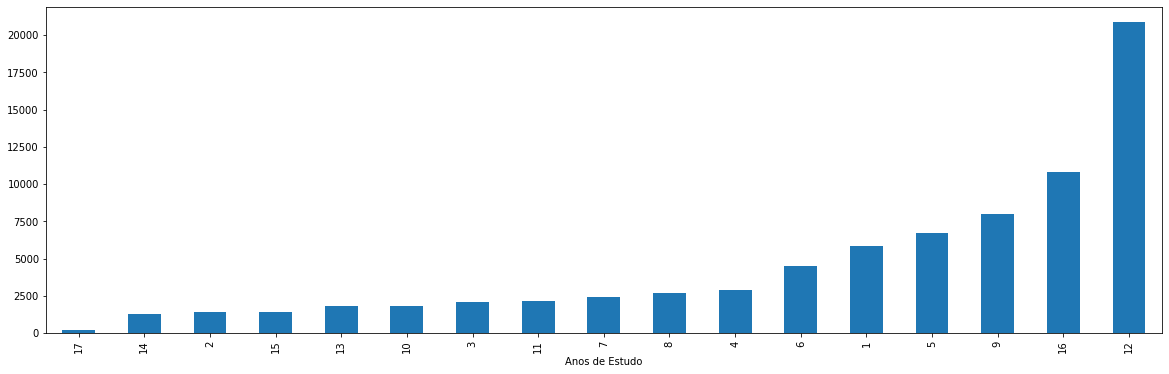

In [58]:
dados.groupby(['Anos de Estudo']).Sexo.count().sort_values().plot(kind='bar').figure.set_size_inches(20,6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Valores')

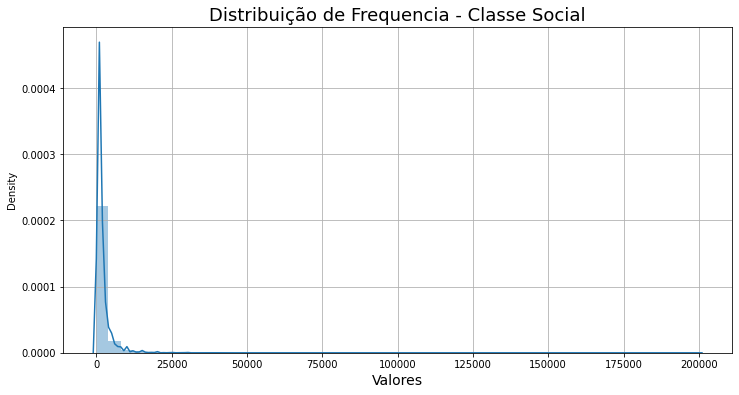

In [59]:
# criando a variável com os dados e utilizando KDE (representa a função e intensidade)
ax = sns.distplot(dados['Renda'])

# Tamanho do grafo
ax.figure.set_size_inches(12,6)
ax.grid()

# add titulos
ax.set_title('Distribuição de Frequencia - Classe Social', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Valores')

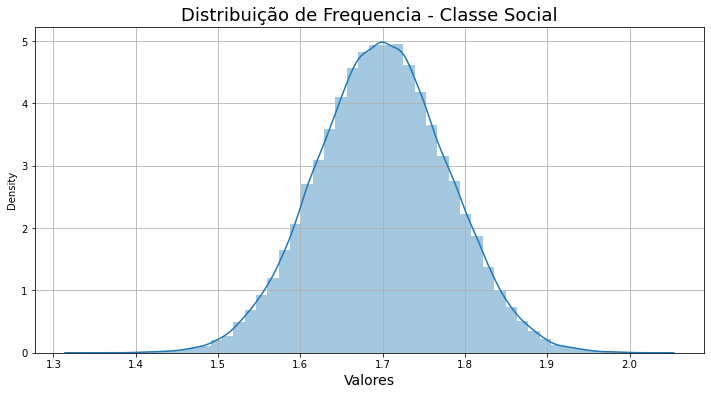

In [52]:
# criando a variável com os dados e utilizando KDE (representa a função e intensidade)
# ax = sns.distplot(dados['Renda'])
ax = sns.distplot(dados['Altura'])

# Tamanho do grafo
ax.figure.set_size_inches(12,6)
ax.grid()

# add titulos
ax.set_title('Distribuição de Frequencia - Classe Social', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

> ### Conclusões

Escreva suas conclusões aqui...

"Gazeta publica hoje breve nota de faxina na quermesse"

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 25.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


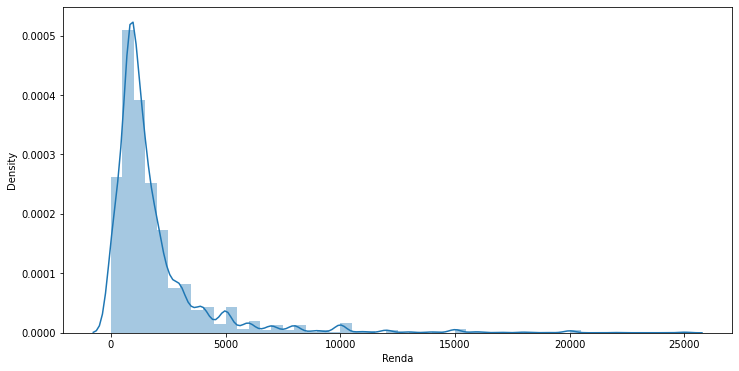

In [64]:
ax = sns.distplot(dados.query('Renda <= 25000').Renda)
ax.figure.set_size_inches(12, 6)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzamento das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

#### <font color='red'>Obs: Caso julgue necessário, efetue as devidas alterações nesse dicionário de acordo com suas particularidades.</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [119]:
# Construindo a tabela com crosstab
freq = pd.crosstab(dados.Sexo, 
                   dados.Cor)
freq.rename(index={0:'Masculino',1:'Feminino'}, inplace=True)
freq.rename(columns={
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'}, inplace=True)
freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [115]:
# Criando um Dataframe

freq = dados['Sexo'].value_counts()
percent = dados['Sexo'].value_counts(normalize=True)*100

dist_freq_quali = pd.DataFrame({'Frequencia':freq, 'Porcentagem (%)': percent})
dist_freq_quali.rename(index={0:'Masculino',1:'Feminino'}, inplace=True)
dist_freq_quali

,Frequencia,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [70]:
dados['Renda'].mean()

2000.3831988547631



```
# Isto está formatado como código
```

### Obtenha a mediana

In [72]:
dados['Renda'].median()

1200.0

### Obtenha a moda

In [73]:
dados['Renda'].mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [75]:
dados['Renda'].mad()

1526.4951371644931

### Obtenha a variância

In [76]:
dados['Renda'].var()

11044906.00622118

### Obtenha o desvio-padrão

In [77]:
dados['Renda'].std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [146]:
# Construindo a tabela com crosstab
freq = pd.crosstab(dados.Cor, 
                   dados.Sexo,
                   aggfunc={'mean', 'median', 'max'},
                   values=dados.Renda)
freq.rename(columns={0:'Masculino',1:'Feminino'}, inplace=True) 
freq.rename(index={
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'}, inplace=True)
freq

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [145]:
# Construindo a tabela com crosstab
freq = pd.crosstab(dados.Cor, 
                   dados.Sexo,
                   aggfunc={'mad', 'var', 'std'},
                   values=dados.Renda)
freq.rename(columns={0:'Masculino',1:'Feminino'}, inplace=True)
freq.rename(index={
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'}, inplace=True)
freq

mad               ...           var              
Sexo        Masculino     Feminino  ...     Masculino      Feminino
Cor                                 ...                            
Indígena   798.910889  3007.892952  ...  1.449841e+06  1.429818e+08
Branca    2261.012346  1670.967106  ...  2.257002e+07  1.056909e+07
Preta      975.602482   705.453357  ...  3.749294e+06  1.821960e+06
Amarela   3709.597211  2549.146322  ...  3.295707e+07  1.392166e+07
Parda     1125.827704   811.580946  ...  5.345747e+06  2.547960e+06

[5 rows x 6 columns]

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [124]:
# Construindo a tabela com crosstab
freq = pd.crosstab(dados.Sexo, 
                   dados.Cor)
freq.rename(index={0:'Masculino',1:'Feminino'}, inplace=True)
freq.rename(columns={
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'}, inplace=True)
freq

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


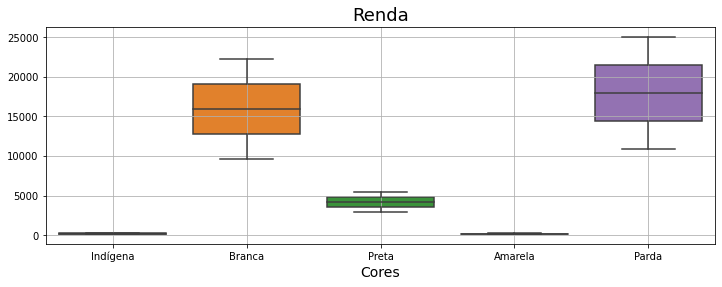

In [130]:
ax = sns.boxplot(data=freq, orient='v')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('Cores', fontsize=14)
ax.grid()
ax

> ### Conclusões

Escreva suas conclusões aqui...
### Pelo boxplot podemos ver que:

> 1) Os amarelos são os que ganham menos se comparado com os demais

> 2) Os indigenas ganham um pouco a mais que os amarelos

> 3) Os Afrodescendentes ganham melhor do que esses dois anteriores com salarios abaixo de 5000

> 4) Os brancos recebem melhor do que os demais e sua distancia interquartis está entre 12500 e 17500

> 5) Os pardos receem melhor que os demais e com seus interquartis variando entre aproximadamente 15000 e 22000

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 1.100,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [134]:
from scipy import stats
stats.percentileofscore(dados['Renda'], 1100)


45.70210827693909

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [136]:
print(dados['Renda'].quantile(0.99))

15000.0


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [144]:
# Construindo a tabela com crosstab
freq = pd.crosstab(dados['Anos de Estudo'],
                   dados.Sexo,
                   aggfunc={'mean', 'median', 'max', 'std'},
                   values=dados.Renda)
freq.rename(columns={0:'Masculino',1:'Feminino'}, inplace=True)
freq.rename(index={
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}, inplace=True)
freq

max            ...          std             
Sexo                           Masculino  Feminino  ...    Masculino     Feminino
Anos de Estudo                                      ...                          
Sem instrução e menos de 1 ano   30000.0   10000.0  ...  1023.904884   639.311534
1 ano                            30000.0    2000.0  ...  1331.950552   425.291842
2 anos                           40000.0    4000.0  ...  1435.173827   498.234168
3 anos                           80000.0    3500.0  ...  2143.800133   424.124446
4 anos                           50000.0   10000.0  ...  1419.821787   629.553397
5 anos                           35000.0    8000.0  ...  1484.650587   635.782641
6 anos                           25000.0    6000.0  ...  1476.628602   574.547028
7 anos                           40000.0    9000.0  ...  1419.708673   602.038029
8 anos                           30000.0   18000.0  ...  1515.583715   896.781213
9 anos                           60000.0   20000.0  ...  2137.664774   973.221652
10 anos                          45000.0    6000.0  ...  2078.609734   620.611907
11 anos                         200000.0  100000.0  ...  2676.538942  1819.040417
12 anos                          30000.0  120000.0  ...  2268.081538  4851.833513
13 anos                          25000.0   20000.0  ...  2797.116800  2053.789771
14 anos                          50000.0   20000.0  ...  3987.214974  2064.083336
15 anos ou mais                 200000.0  100000.0  ...  7447.613594  4212.770709
Não determinados                  7000.0    3000.0  ...   979.648745   459.985964

[17 rows x 8 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. </i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [158]:
abaixo10mil=dados['Renda']<10000
filtered_abaixo10mil = dados[abaixo10mil]
filtered_abaixo10mil

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


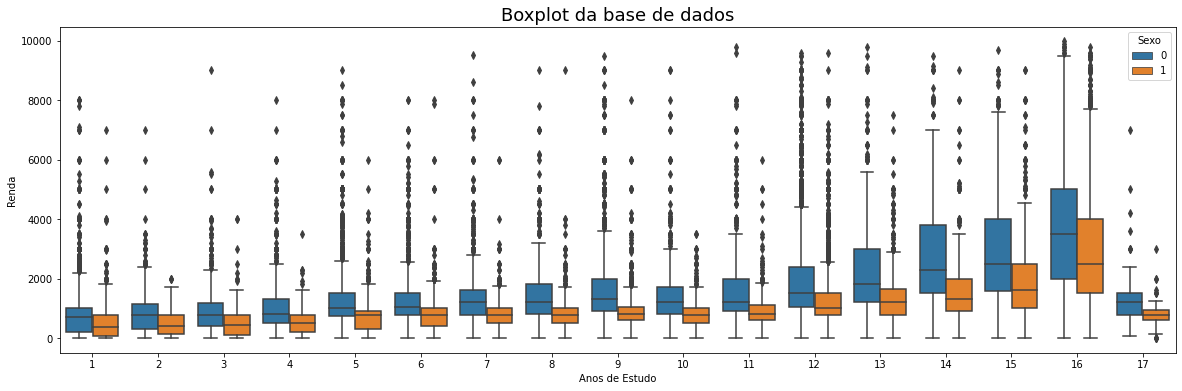

In [188]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(20, 6))

# Gráfico boxplot
ax = sns.boxplot(x = "Anos de Estudo", y ="Renda", hue="Sexo",data = filtered_abaixo10mil)  

# Adicionando Título ao gráfico
plt.title("Boxplot da base de dados", loc="center", fontsize=18)
plt.xlabel("Anos de Estudo")
plt.ylabel("Renda")

plt.show()

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [189]:
dados.groupby(['UF']).agg({'Renda':['mean','median','max', 'std']})

Renda                            
           mean median     max          std
UF                                         
11  1789.761223   1200   50000  2406.161161
12  1506.091782    900   30000  2276.233415
13  1445.130100    900   22000  1757.935591
14  1783.588889   1000   20000  2079.659238
15  1399.076871    850   50000  2053.779555
16  1861.353516   1200   15580  2020.688632
17  1771.094946   1000   60000  2934.590741
21  1019.432009    700   30000  1887.816905
22  1074.550784    750   40000  2373.355726
23  1255.403692    789   25000  1821.963536
24  1344.721480    800   15500  1651.805500
25  1293.370487    788   30000  1950.272431
26  1527.079319    900   50000  2389.622497
27  1144.552602    788   11000  1237.856197
28  1109.111111    788   16000  1478.997878
29  1429.645094    800  200000  3507.917248
31  2056.432084   1200  100000  3584.721547
32  2026.383852   1274  100000  3513.846868
33  2496.403168   1400  200000  5214.583518
35  2638.104986   1600   80000  3503.777366
41  2493.870753   1500  200000  4302.937995
42  2470.854945   1800   80000  3137.651112
43  2315.158336   1500   35000  2913.335783
50  2262.604167   1500   42000  3031.419122
51  2130.652778   1500   35000  2542.630178
52  1994.580794   1500   30000  2221.933065
53  4241.954722   2000  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [190]:
filtered_abaixo10mil.groupby(['UF']).agg({'Renda':['mean','median','max', 'std']})

Renda                           
           mean  median   max          std
UF                                        
11  1632.475658  1200.0  9800  1405.391796
12  1334.760776   890.0  9000  1333.508666
13  1332.383066   900.0  9000  1296.287205
14  1650.071161  1000.0  8000  1610.861018
15  1237.548681   850.0  9500  1197.306734
16  1669.787276  1200.0  8500  1408.004816
17  1494.193297  1000.0  9580  1481.191672
21   874.131222   632.5  9600  1143.513035
22   884.613011   700.0  8773  1107.607252
23  1132.800781   788.0  9500  1232.638420
24  1247.836100   800.0  9000  1301.898681
25  1139.024662   788.0  9500  1306.466161
26  1309.506117   890.0  9800  1348.605123
27  1113.923333   788.0  9000  1119.804362
28  1007.281005   788.0  8000  1069.532003
29  1200.026050   800.0  9200  1224.696387
31  1641.735983  1200.0  9800  1500.964738
32  1672.142566  1200.0  9000  1373.623133
33  1866.010638  1400.0  9600  1532.913866
35  2065.859119  1500.0  9800  1577.145905
41  1975.489281  1500.0  9100  1532.996788
42  2123.824458  1700.0  9200  1497.051998
43  1882.825147  1500.0  9975  1554.629250
50  1879.564907  1400.0  9600  1580.498012
51  1851.803977  1500.0  9500  1454.355923
52  1786.121602  1426.0  9000  1376.136695
53  2684.910744  1800.0  9900  2210.633909

> ### Conclusões

***É um poema sobre a (Batalha de calaclava). Avança a brigada ligeira. Para o vale da morte foram os 600. Avança a brigada ligeira. Algum homem desistiu? Nenhum! mesmo sabendo que era engano. Alguém cometeu um erro? Sim o líder. Então porque eles seguiram mesmo sabendo da falha do líder? É porque eles não tinham como negar não podiam recusar (PARA O VALE DA MORTE CAVALGARAM OS 600)!“A coragem é uma coisa difícil de definir! A coragem pode se basear em uma ideia idiota ou em um erro, mas você não pode questionar os adultos, seu treinador, professor, chefe etc… Porque eles fazem as regras, talvez eles saibam mais……talvez não, tudo depende de quem você é de onde você vem. Será que ao menos 1 dos 600 homens não pensou em desistir e passar para o outro lado? Porque o vale da morte é um coisa bem pesada, por isso a coragem é complicada. Será mesmo que a ordem é sempre certa, simplesmente obedeça a regra? Comigo já aconteceu de não saber porque estava fazendo ou vivendo a situação do momento… (em tom irónico digo que "qualquer tolo pode ter coragem” mas honra essa é a verdadeira razão pra se fazer ou não qualquer coisa, é quem você é e talvez quem você quer ser.) Se você morre tentando fazer uma coisa importante então você tem honra e coragem e isso é muito bom! O escritor quis dizer que você deve pedir coragem e agir com honra e talvez até rezar para que as pessoas que mandam as tenham também .”Trecho do filme: THE BLIND SIDE! (Um sonho possível) Um filme lindo, eu indico para aquelas pessoas que gostam de ver um filme com conteúdo, um filme que te ajuda a ver a vida de maneira diferente; indico às pessoas que ainda se preocupam com a realidade que nos cerca, e que lutam por uma realidade melhor. Indico às pessoas que passam por esse vale da morte com a cabeça erguida. ***

[link](https://www.limeirascontabilidade.com.br/boletim/para-o-vale-da-morte-cavalgaram-600-191)